In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/LungCancer

/content/drive/MyDrive/LungCancer


In [ ]:
!unzip IQ-OTHNCCD_dataset.zip -d dataset

Archive:  IQ-OTHNCCD_dataset.zip
replace dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (100).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (101).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (102).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (103).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (104).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (105).jpg  
  inflating: dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (106).jpg  
  inflat

In [ ]:
import os
import imageio
import numpy as np
import shutil
import pandas as pd
import cv2

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

In [ ]:
dir = '/content/drive/MyDrive/LungCancer/dataset/The IQ-OTHNCCD lung cancer dataset'
categories = sorted(os.listdir(dir))
print(categories)
len(categories)

['Bengin cases', 'IQ-OTH_NCCD lung cancer dataset.txt', 'Malignant cases', 'Normal cases']


4

In [ ]:
os.remove('/content/drive/MyDrive/LungCancer/dataset/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt')

In [ ]:
categories = sorted(os.listdir(dir))
print(categories)
len(categories)

['Bengin cases', 'Malignant cases', 'Normal cases']


3

In [ ]:
def train_test_split():
    print("########### Train Test Script started ###########")
    root_dir = '/content/drive/MyDrive/LungCancer/splitted_dataset'
    classes_dir = ['Bengin cases', 'Malignant cases', 'Normal cases']
    processed_dir = '/content/drive/MyDrive/LungCancer/dataset/The IQ-OTHNCCD lung cancer dataset'
    test_ratio = 0.10

    for cls in classes_dir:
        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"/" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * (1 - test_ratio)) ])

        train_FileNames = [src + '/' + name for name in train_FileNames.tolist()]
        test_FileNames = [src + '/' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # # Creating Train Test folders (One time use)
        os.makedirs(root_dir + '/train/' + cls)
        os.makedirs(root_dir + '/test/' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train/' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test/' + cls)

    print("########### Train Test Script Ended ###########")

train_test_split()

########### Train Test Script started ###########
$$$$$$$ Class Name Bengin cases $$$$$$$
Total images: 120
Training: 108
Testing: 12
$$$$$$$ Class Name Malignant cases $$$$$$$
Total images: 561
Training: 504
Testing: 57
$$$$$$$ Class Name Normal cases $$$$$$$
Total images: 416
Training: 374
Testing: 42
########### Train Test Script Ended ###########


In [ ]:
dir1 = '/content/drive/MyDrive/LungCancer/splitted_dataset'
cat1 = sorted(os.listdir(dir1))
print(cat1)

['test', 'train']


In [ ]:
data_path = '/content/drive/MyDrive/LungCancer/splitted_dataset/train'
categories  = sorted(os.listdir(data_path))
print(categories )

['Bengin cases', 'Malignant cases', 'Normal cases']


In [ ]:
size_data = {}
for i in categories:
    path = os.path.join(data_path, i)
    print(path)
    class_num = categories.index(i)
    print(class_num)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    
    size_data[i] = temp_dict
        
size_data

/content/drive/MyDrive/LungCancer/splitted_dataset/train/Bengin cases
0
/content/drive/MyDrive/LungCancer/splitted_dataset/train/Malignant cases
1
/content/drive/MyDrive/LungCancer/splitted_dataset/train/Normal cases
2


{'Bengin cases': {'512 x 512': 108},
 'Malignant cases': {'404 x 511': 1,
  '512 x 512': 450,
  '512 x 623': 25,
  '512 x 801': 28},
 'Normal cases': {'331 x 506': 1, '512 x 512': 373}}

Bengin cases


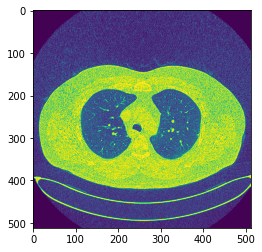

Malignant cases


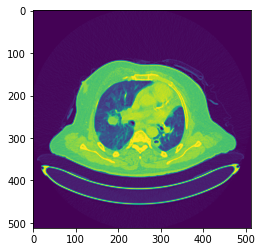

Normal cases


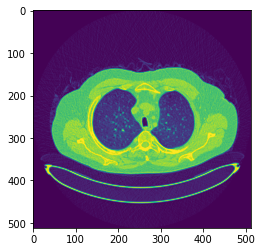

In [ ]:
for i in categories:
    path = os.path.join(data_path, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

In [ ]:
# Loading the images and their class(0 - 2)
image_data = []
img_size=256
for i in categories:
    path = os.path.join(data_path, i)
    print(path)
    class_num = categories.index(i)
    print(class_num)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img_arr = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        # preprocess here
        img = cv2.resize(img_arr, (img_size, img_size))
        image_data.append([img, class_num])       

/content/drive/MyDrive/LungCancer/splitted_dataset/train/Bengin cases
0
/content/drive/MyDrive/LungCancer/splitted_dataset/train/Malignant cases
1
/content/drive/MyDrive/LungCancer/splitted_dataset/train/Normal cases
2


In [ ]:
# shuffle the input data
import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [ ]:
label[:7]

[1, 0, 2, 1, 1, 2, 1]

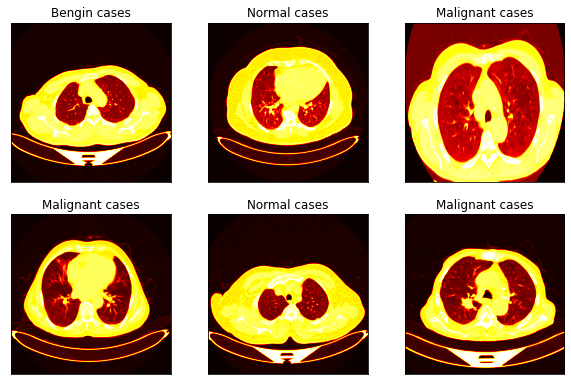

In [ ]:
plt.figure(1, figsize=(10,10))
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]])
plt.show()

In [ ]:
print( "Image in form of array:\n" , input_data[0])
print( "Image label: " , label[0])

Image in form of array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Image label:  1


In [ ]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(986, 256, 256)

In [ ]:
# one hot encoding
from tensorflow.keras.utils import to_categorical
label = to_categorical(label, num_classes=3,dtype='i1')
label[0]

array([0, 1, 0], dtype=int8)

In [ ]:
# reshaping the data
input_data.shape = (-1, img_size,img_size, 1)

In [ ]:
input_data.shape

(986, 256, 256, 1)

In [ ]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(input_data, label, random_state=10, test_size = 0.2)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

788 (788, 256, 256, 1)
198 (198, 256, 256, 1)


In [ ]:
print("Found {} training images belonging to 3 classes".format(X_train.shape[0]))
print("Found {} testing images belonging to 3 classes".format(X_valid.shape[0]))

Found 788 training images belonging to 3 classes
Found 198 testing images belonging to 3 classes


In [ ]:
input_foldr = '/content/drive/MyDrive/LungCancer/splitted_dataset/train'
files_per_class = []
for folder in os.listdir(input_foldr):
    if not os.path.isfile(folder):
            files_per_class.append(len(os.listdir(input_foldr + '/' + folder)))

files_per_class

[108, 504, 374]

In [ ]:
total_files = sum(files_per_class)
print(total_files)
class_weights = {}
for i in range(len(files_per_class)):
    class_weights[i] = 1 - (float(files_per_class[i]) / total_files)
print(class_weights)

986
{0: 0.8904665314401623, 1: 0.4888438133874239, 2: 0.6206896551724138}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation
from tensorflow.keras.optimizers import SGD
from keras import losses

In [ ]:
# Step 1 - Building the CNN

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D((2, 2)))
# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [ ]:
# fit model
history = model.fit(X_train, y_train, steps_per_epoch= len(X_train)//32,
	validation_data= (X_valid, y_valid), validation_steps= len(X_valid)//32, epochs=3, verbose=2,class_weight=class_weights)

Epoch 1/3
24/24 - 97s - loss: 0.4038 - accuracy: 0.7297 - val_loss: 0.3691 - val_accuracy: 0.8687 - 97s/epoch - 4s/step
Epoch 2/3
24/24 - 94s - loss: 0.1938 - accuracy: 0.8858 - val_loss: 0.1325 - val_accuracy: 0.9697 - 94s/epoch - 4s/step
Epoch 3/3
24/24 - 95s - loss: 0.0504 - accuracy: 0.9822 - val_loss: 0.0539 - val_accuracy: 0.9848 - 95s/epoch - 4s/step


In [ ]:
model.save('cnn_model1.h5')

In [ ]:
model_json = model.to_json()
with open("cnn_model1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('cnn_model1_weights.h5')

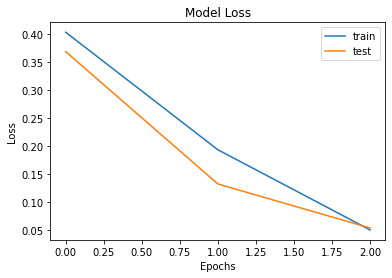

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
# save the figure
plt.savefig('loss_plot1.png', dpi=300, bbox_inches='tight')
plt.show()

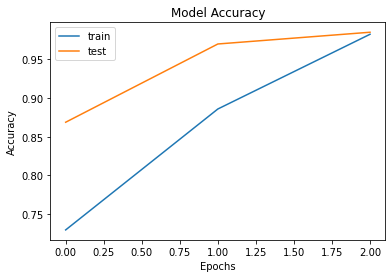

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
# save the figure
plt.savefig('accuracy1.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_valid, y_valid)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

7/7 [==============================] - 6s 792ms/step - loss: 0.0539 - accuracy: 0.9848
Test accuracy: 98.48%


In [ ]:
#calculate loss and accuracy on test data

train_loss, train_accuracy = model.evaluate(X_train, y_train)

print('Train accuracy: {:2.2f}%'.format(train_accuracy*100))

25/25 [==============================] - 22s 897ms/step - loss: 0.0308 - accuracy: 0.9911
Train accuracy: 99.11%


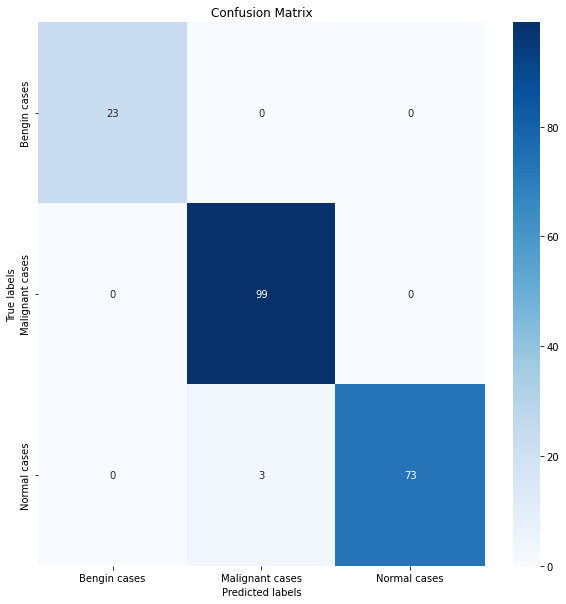

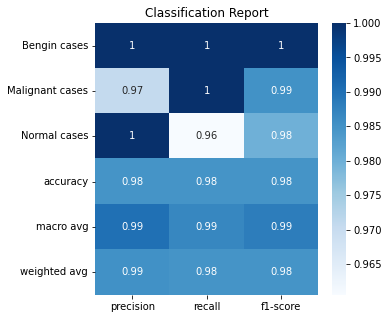

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

def PerformanceReports(conf_matrix,class_report,labels):
    f, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_matrix, annot=True,ax=ax,cmap="Blues")
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.savefig('cmatrix1.png', dpi=300, bbox_inches='tight')
    plt.show()
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
    ax.set_title('Classification Report')
    plt.savefig('creport1.png', dpi=300, bbox_inches='tight')
    plt.show() 
labels=['Bengin cases', 'Malignant cases', 'Normal cases']

test_labels = np.argmax(y_valid, axis=1)
predictions = np.argmax(model.predict(X_valid), axis=1)

cm=confusion_matrix(test_labels,predictions)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
PerformanceReports(cm,class_report,labels)

In [ ]:
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):


    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(False)

    #if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    plt.savefig('conmatrix1.png', dpi=300, bbox_inches='tight')
    plt.show()
    
   

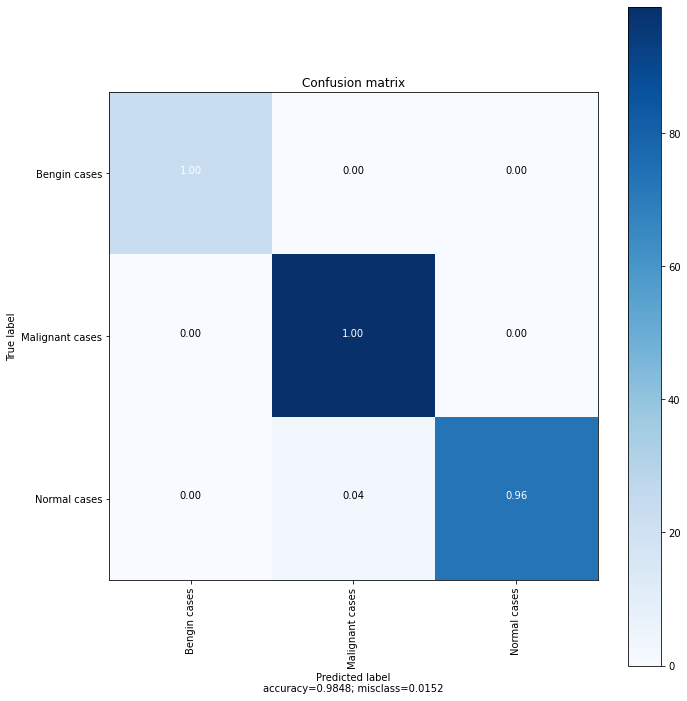

In [ ]:
#Plotting the confusion matrix
class_names=['Bengin cases', 'Malignant cases', 'Normal cases']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(cm, class_names, title='Confusion matrix')

In [ ]:
from keras.models import load_model 
model = load_model('/content/drive/MyDrive/LungCancer/cnn_model1.h5')

[[0.04567198 0.5397512  0.41457677]
 [0.09867036 0.6228367  0.27849287]
 [0.01539725 0.90645313 0.07814966]]
1
Malignant cases


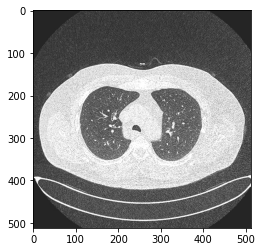

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ['Bengin cases', 'Malignant cases', 'Normal cases']
def prepare(filepath):
    IMG_SIZE=256
    img=cv2.imread(filepath)
    plt.imshow(img)
    img_array = img / 255.0
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)


prediction = model.predict(prepare('/content/drive/MyDrive/LungCancer/splitted_dataset/test/Bengin cases/Bengin case (108).jpg'))
print(prediction)
predictions = np.argmax(prediction,-1)
print(predictions[0])
print(CATEGORIES[int(predictions[0])])

In [ ]:
# Loading the images and their class(0 - 2)
test_data = []
test_path = "/content/drive/MyDrive/LungCancer/splitted_dataset/test"
classes = sorted(os.listdir(test_path))

for i in classes:
    path = os.path.join(test_path, i)
    print(path)
    class_num = classes.index(i)
    print(class_num)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        test_data.append([filepath, class_num])

/content/drive/MyDrive/LungCancer/splitted_dataset/test/Bengin cases
0
/content/drive/MyDrive/LungCancer/splitted_dataset/test/Malignant cases
1
/content/drive/MyDrive/LungCancer/splitted_dataset/test/Normal cases
2


In [ ]:
test_file = []
label = []
for X, y in test_data:
    test_file.append(X)
    label.append(y)

In [ ]:
CATEGORIES = ['Bengin cases', 'Malignant cases', 'Normal cases']
preds = []
pred_file = []
def prepare(test_path):
    IMG_SIZE=256
    img_array=cv2.imread(test_path,cv2.IMREAD_GRAYSCALE)
    pred_file.append(test_path)
    
    img_array = img_array / 255.0
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

for i in test_file:
    prediction = model.predict(prepare(i))
    predictions = np.argmax(prediction,-1)
    preds.append(predictions[0])

In [ ]:
df = pd.DataFrame({
    'File': test_file,
    'Actual' :label,
    'Path':pred_file,
    'Predicted' : preds
})
comparison_column = np.where(df["Actual"] == df["Predicted"], True, False)
df["Equal"] = comparison_column
df.to_csv("predictions1.csv")
df.head()

,File,Actual,Path,Predicted,Equal
0,/content/drive/MyDrive/LungCancer/splitted_dat...,0,/content/drive/MyDrive/LungCancer/splitted_dat...,0,True
1,/content/drive/MyDrive/LungCancer/splitted_dat...,0,/content/drive/MyDrive/LungCancer/splitted_dat...,0,True
2,/content/drive/MyDrive/LungCancer/splitted_dat...,0,/content/drive/MyDrive/LungCancer/splitted_dat...,0,True
3,/content/drive/MyDrive/LungCancer/splitted_dat...,0,/content/drive/MyDrive/LungCancer/splitted_dat...,0,True
4,/content/drive/MyDrive/LungCancer/splitted_dat...,0,/content/drive/MyDrive/LungCancer/splitted_dat...,0,True


In [ ]:
df["Equal"].value_counts()

True     110
False      1
Name: Equal, dtype: int64